# Explore Data Analysis

In [14]:
import numpy as np
import pandas as pd
import datetime
import random
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")                                                      


In [15]:
import os
os.getcwd()

'/Users/danny/Desktop/MDS/master 4/CITS 5553 Data Science Capstone Project/Group/Energy-Usage-Prediction-Project/Zheyu/Used Data'

In [16]:
os.chdir('/Users/danny/Desktop/MDS/master 4/CITS 5553 Data Science Capstone Project/Group/Energy-Usage-Prediction-Project/Zheyu/Used Data')

## Weather Underground Data

In [17]:
df = pd.read_csv('aemo_wu_merged.csv', index_col = 0)
df.head()

             timestamp  Temperature  Dew Point  Humidity  Wind Speed  \
0  2006-09-20 00:00:00        13.89      12.22      88.0         5.0   
1  2006-09-20 00:30:00        13.89      12.22      88.0        13.0   
2  2006-09-20 01:00:00        13.89      10.00      77.0         8.0   
3  2006-09-20 01:30:00        13.89      11.11      82.0         8.0   
4  2006-09-20 02:00:00        15.00      12.22      82.0        10.0   

   Wind Gust  Pressure  Precip.  Operational Demand (MW)  
0        0.0      30.0      0.0                 1347.418  
1        0.0      30.0      0.0                 1312.708  
2        0.0      30.0      0.0                 1298.644  
3        0.0      30.0      0.0                 1288.972  
4        0.0      30.0      0.0                 1282.006  

In [18]:
df = df.rename(columns={'Temperature':'temperature(celcius)', 'Dew Point':'dew_point(celcius)', 'Humidity':'humidity(%)', 'Wind Speed':'wind_speed(mph)',
       'Wind Gust':'wind_gush(mph)', 'Pressure':'pressure(in)', 'Precip.':'precip.(in)'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270281 entries, 0 to 270280
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   timestamp                270281 non-null  object 
 1   temperature(celcius)     270281 non-null  float64
 2   dew_point(celcius)       270281 non-null  float64
 3   humidity(%)              270281 non-null  float64
 4   wind_speed(mph)          270281 non-null  float64
 5   wind_gush(mph)           270281 non-null  float64
 6   pressure(in)             270281 non-null  float64
 7   precip.(in)              270281 non-null  float64
 8   Operational Demand (MW)  270281 non-null  float64
dtypes: float64(8), object(1)
memory usage: 20.6+ MB


In [20]:
df.describe()

       temperature(celcius)  dew_point(celcius)    humidity(%)  \
count         270281.000000       270281.000000  270281.000000   
mean              18.777157            9.740022      61.071733   
std                6.749126            4.355543      22.720635   
min               -1.110000          -15.000000       4.666667   
25%               13.890000            7.220000      44.000000   
50%               17.780000           10.000000      60.000000   
75%               22.780000           12.780000      82.000000   
max               42.780000           30.000000     100.000000   

       wind_speed(mph)  wind_gush(mph)   pressure(in)  precip.(in)  \
count    270281.000000   270281.000000  270281.000000     270281.0   
mean         10.881389        1.386504      29.345145          0.0   
std           5.296412        6.104055       0.475292          0.0   
min           0.000000        0.000000      29.000000          0.0   
25%           7.000000        0.000000      29.000000  

In [21]:
# Seperate timestamp and set several new variables
def wind_ans(x):
    if x > 0: 
        return 1 
    else:
        return 0
df[['Date','Trading Interval Time']] = df['timestamp'].str.split(" ",expand=True)  # split time into date and interval timedf['Date'] = pd.to_datetime(df['Date'])
# df['year'] = df['Date'].dt.year
# df['month'] = df['Date'].dt.month
# df['day'] = df['Date'].dt.day
df['Date'] = pd.to_datetime(df['Date'])
df['new_timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['year'] = df['new_timestamp'].dt.year
df['month'] = df['new_timestamp'].dt.month
df['day'] = df['new_timestamp'].dt.day
df['hour'] = df['new_timestamp'].dt.hour
df['minute'] = df['new_timestamp'].dt.minute
df['Day_of_week'] = df['new_timestamp'].dt.dayofweek
df['Day_of_month'] = df['new_timestamp'].dt.day
df['Day_of_year'] = df['new_timestamp'].dt.dayofyear
df['has_Wind'] = df['wind_speed(mph)'].apply(wind_ans) 
df.set_index('timestamp', inplace=True, drop=True)
df.reset_index(inplace=True)
df.head()

             timestamp  temperature(celcius)  dew_point(celcius)  humidity(%)  \
0  2006-09-20 00:00:00                 13.89               12.22         88.0   
1  2006-09-20 00:30:00                 13.89               12.22         88.0   
2  2006-09-20 01:00:00                 13.89               10.00         77.0   
3  2006-09-20 01:30:00                 13.89               11.11         82.0   
4  2006-09-20 02:00:00                 15.00               12.22         82.0   

   wind_speed(mph)  wind_gush(mph)  pressure(in)  precip.(in)  \
0              5.0             0.0          30.0          0.0   
1             13.0             0.0          30.0          0.0   
2              8.0             0.0          30.0          0.0   
3              8.0             0.0          30.0          0.0   
4             10.0             0.0          30.0          0.0   

   Operational Demand (MW)       Date  ...       new_timestamp  year  month  \
0                 1347.418 2006-09-20  ... 

## Correlation hotmap

In [22]:
corr = df.corr()
corr

                         temperature(celcius)  dew_point(celcius)  \
temperature(celcius)                 1.000000            0.237593   
dew_point(celcius)                   0.237593            1.000000   
humidity(%)                         -0.774617            0.365358   
wind_speed(mph)                      0.385154           -0.028316   
wind_gush(mph)                       0.022758           -0.035744   
pressure(in)                        -0.428773           -0.400050   
precip.(in)                               NaN                 NaN   
Operational Demand (MW)              0.400432            0.095962   
year                                 0.030371            0.042130   
month                               -0.235215           -0.208141   
day                                  0.000101            0.026599   
hour                                 0.249940            0.055058   
minute                               0.000315            0.000034   
Day_of_week                       

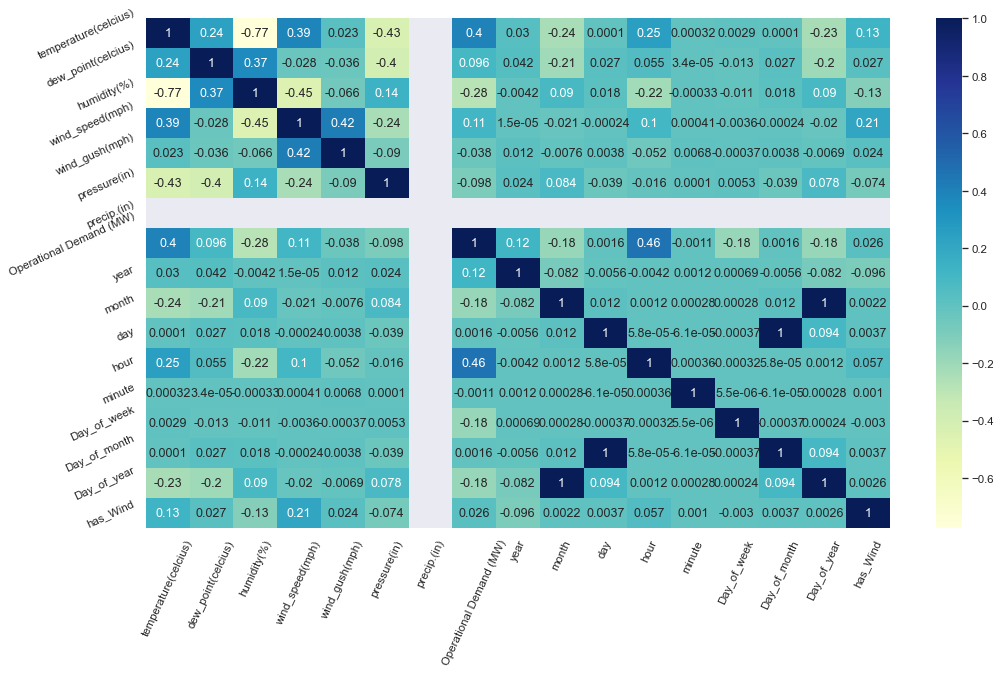

In [23]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.xticks(rotation=65)
plt.yticks(rotation=25)
plt.show()

In [24]:
pd.options.display.notebook_repr_html= False
plt.rcParams['figure.dpi']=75
sns.set_theme(style='darkgrid')

## Long Term

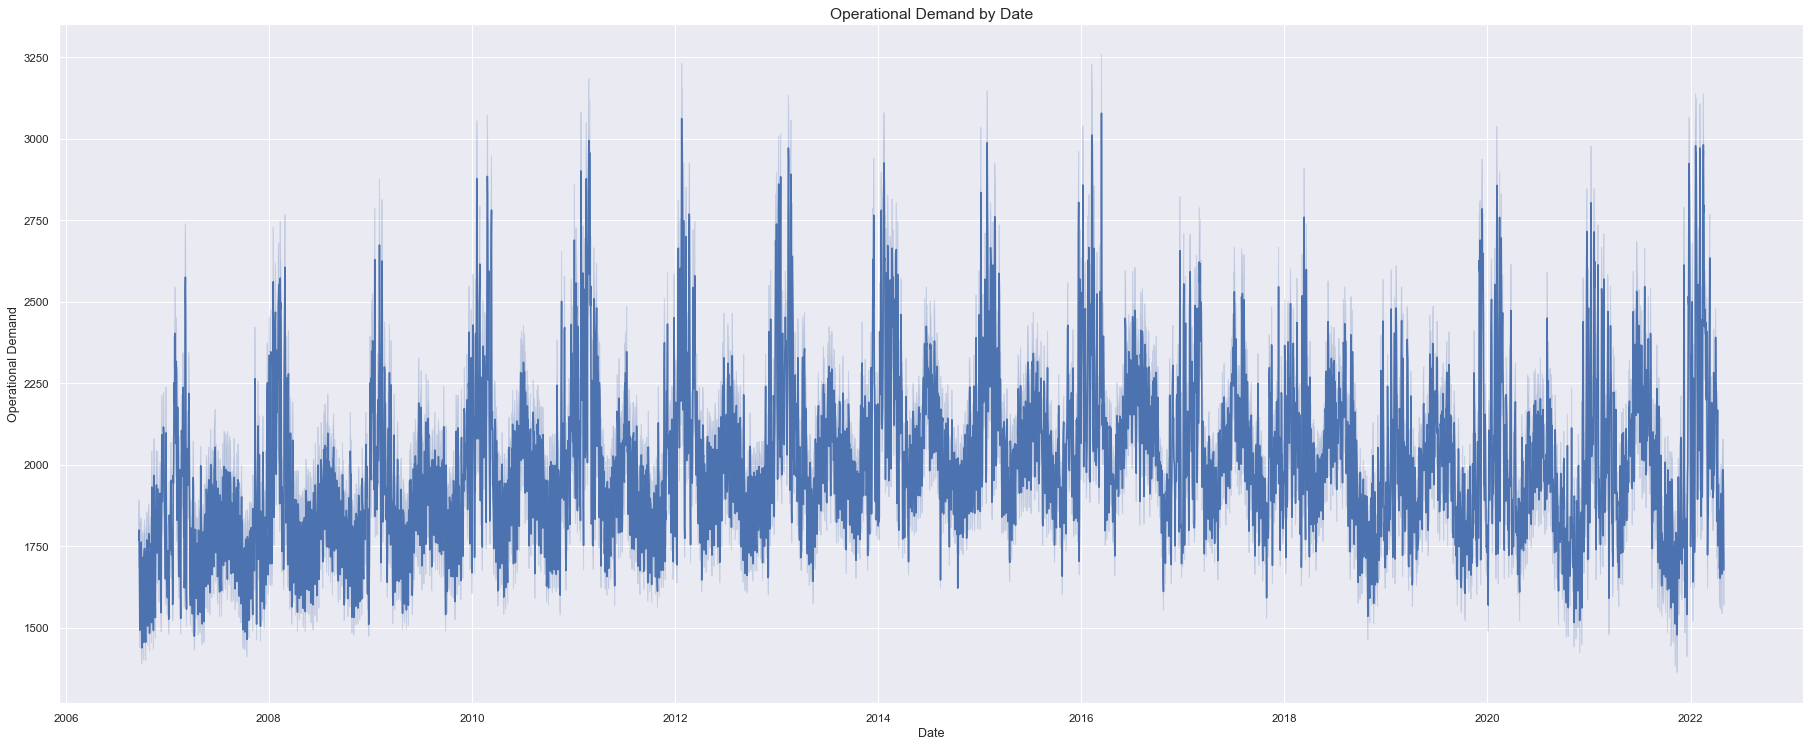

In [25]:
s=pd.DataFrame(dict(y=df['Operational Demand (MW)'],x=df['Date']))
plt.figure(figsize=(30,12))
sns.lineplot(data=s,x= 'x',y='y')
plt.xlabel('Date')
plt.ylabel('Operational Demand')
plt.title("Operational Demand by Date",fontsize = 15)
plt.show()

### per Month
To be more specific, we obtain the mean operational demand of each month and days

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='month,day'>

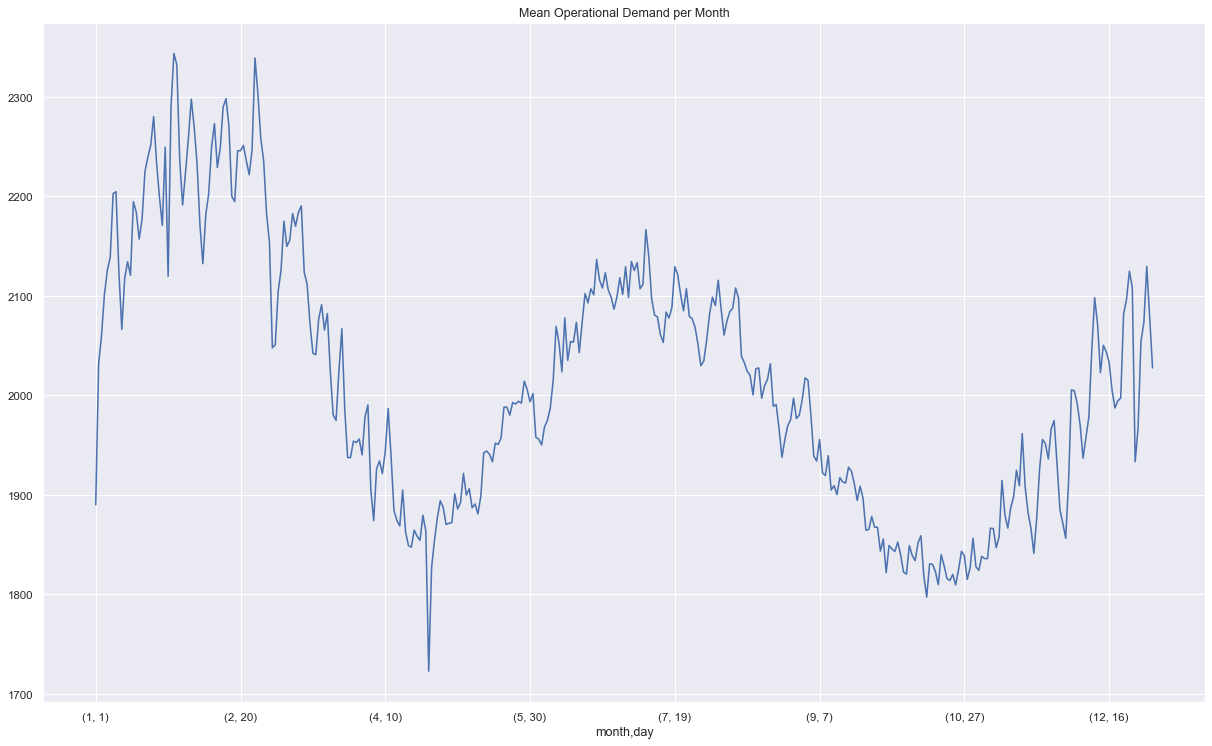

In [26]:
OD_mon_l=df.groupby([df["month"],df["day"]]).mean()['Operational Demand (MW)']
OD_mon_l.plot(title="Mean Operational Demand per Month",figsize=(20,12))

### per Day
Look at the data on a daily basis

<AxesSubplot:title={'center':'Mean Operational Demand per Day'}, xlabel='Trading Interval Time'>

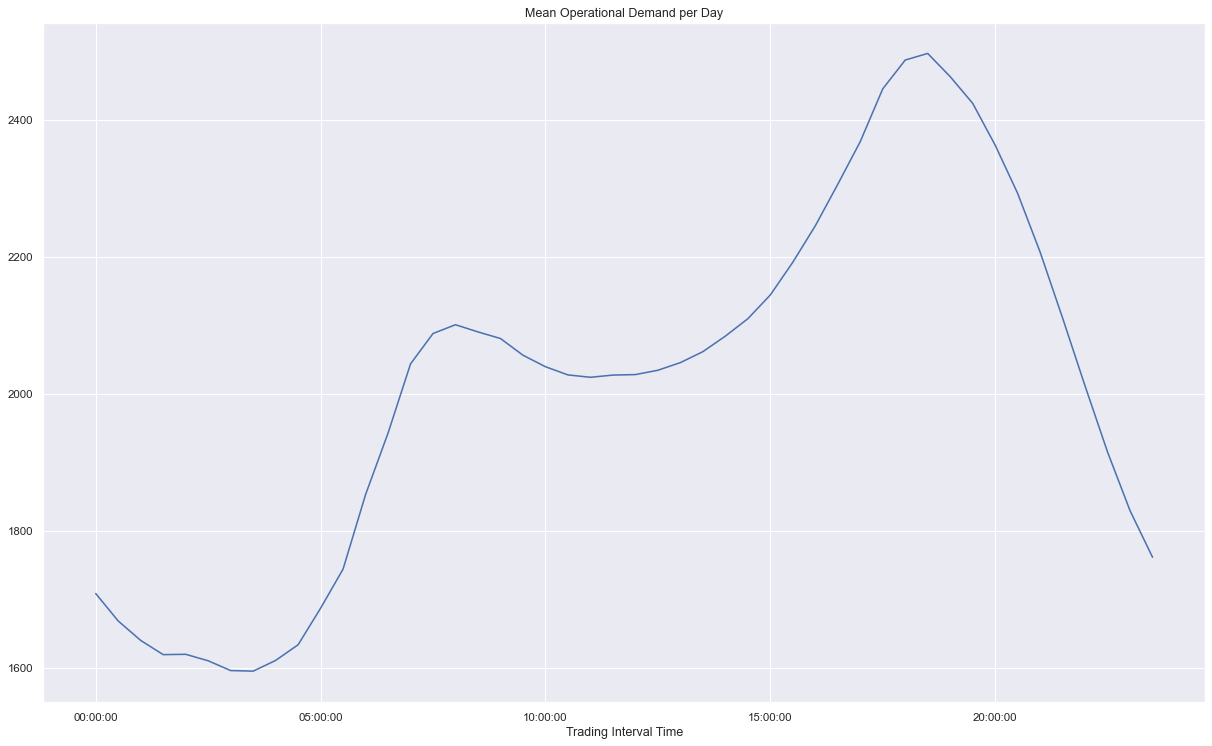

In [27]:
OD_day_l=df.groupby('Trading Interval Time').mean()['Operational Demand (MW)']
OD_day_l.plot(title="Mean Operational Demand per Day",figsize=(20,12))

## Short Term from Dec to Mar

<AxesSubplot:title={'center':'Mean Operational Demand per Month'}, xlabel='year,month,day'>

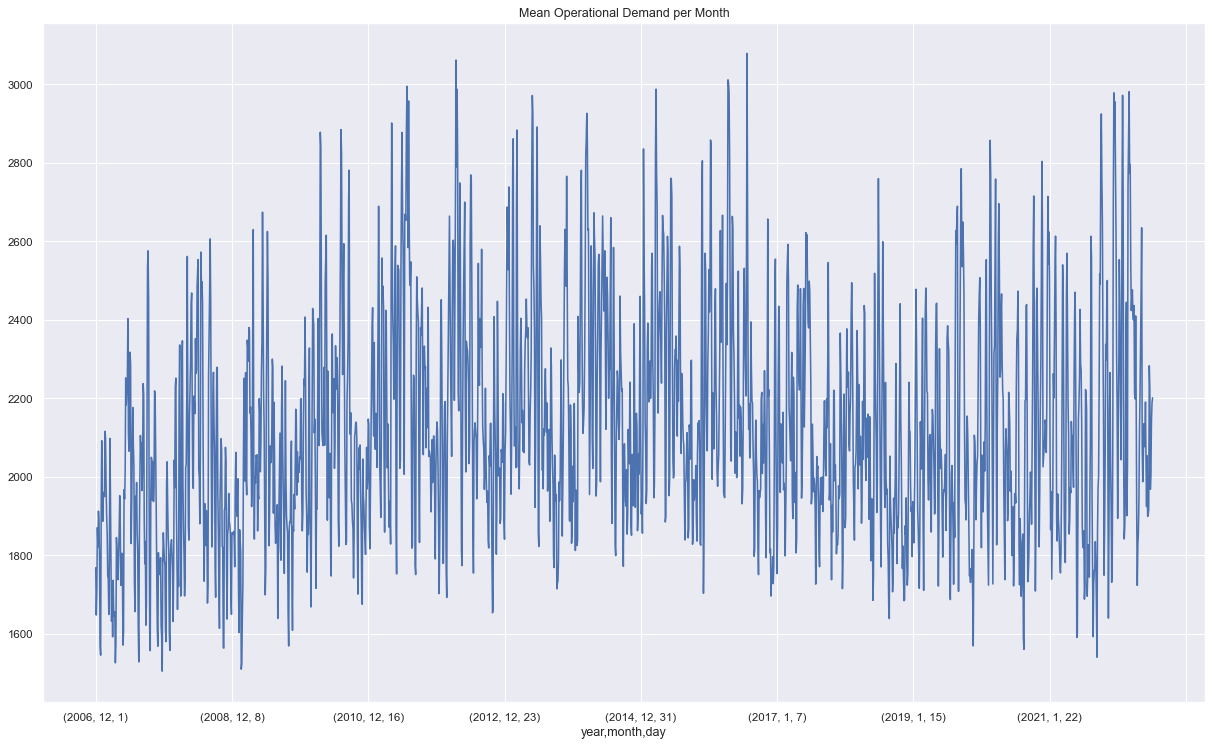

In [28]:
df_s = df[(df['month'] ==12 )|(df['month'] < 4)]
OD_mon_s=df_s.groupby([df_s["year"],df_s["month"],df_s["day"]]).mean()['Operational Demand (MW)']
OD_mon_s.plot(title="Mean Operational Demand per Month",figsize=(20,12)) 


## Facotrs

In [29]:
# Numeric factors
numeric = []
for i in df.columns:
    if df[i].dtype == 'float64':
        if i == 'Operational Demand (MW)':
            pass
        else:
            numeric.append(i)
numeric

['temperature(celcius)',
 'dew_point(celcius)',
 'humidity(%)',
 'wind_speed(mph)',
 'wind_gush(mph)',
 'pressure(in)',
 'precip.(in)']

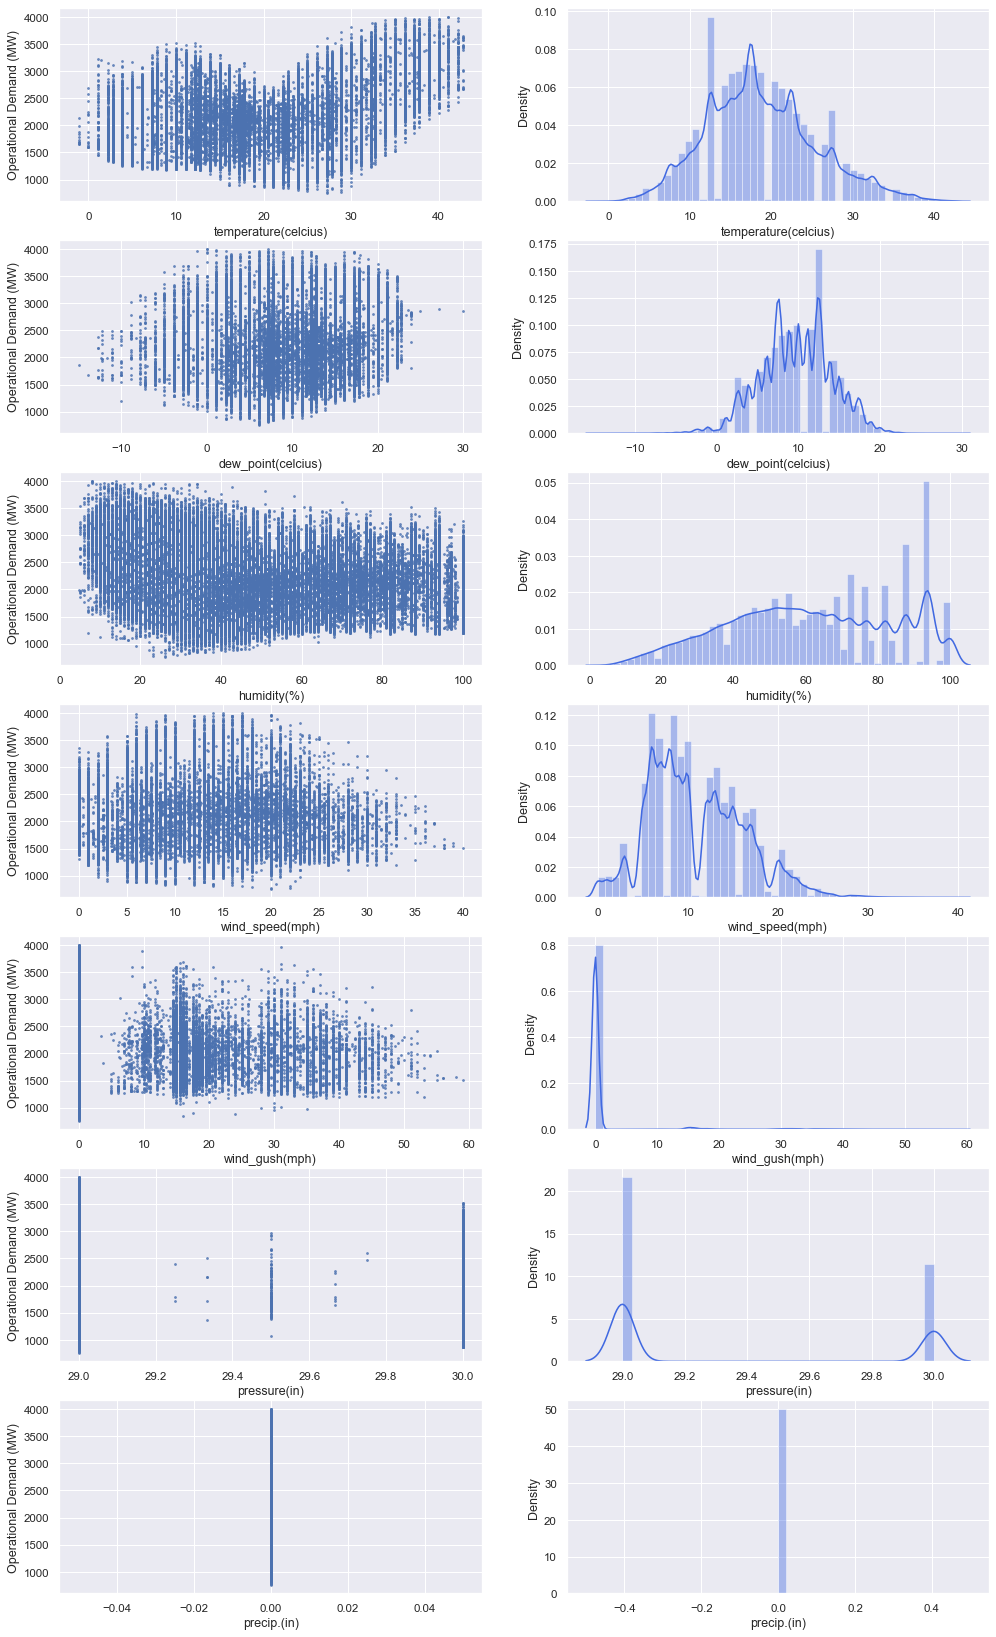

In [30]:
fig, ax = plt.subplots(len(numeric), 2, figsize=(16, len(numeric) * 4))

for n in range(len(numeric)):
    feat = numeric[n]
    ax[n, 0].scatter(df[feat].values, df['Operational Demand (MW)'].values, s=3, alpha = 0.7)
    ax[n, 0].set_ylabel("Operational Demand (MW)")
    ax[n, 0].set_xlabel(feat)

    # Distribution
    sns.distplot(df[feat].dropna(), ax=ax[n, 1], color="royalblue")

### Monthly Trend (temp,humid,wind_speed,dew_point)

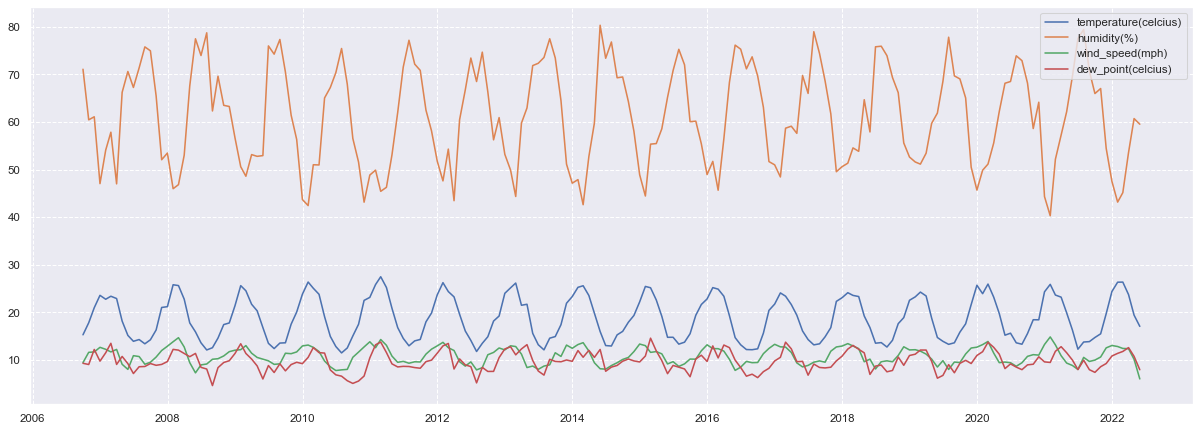

In [31]:
df.set_index('Date', inplace = True)
sub_m_df = df.resample('M')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_m_df.index,sub_m_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_m_df.index,sub_m_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_m_df.index,sub_m_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_m_df.index,sub_m_df["dew_point(celcius)"], label = "dew_point(celcius)")
# plt.plot(sub_m_df.index,sub_m_df["Operational Demand (MW)"], label = "Operational Demand (MW)")
plt.grid(linestyle = "--")
plt.legend()

### Weekly Trend (temp,humid,wind_speed,dew_point)

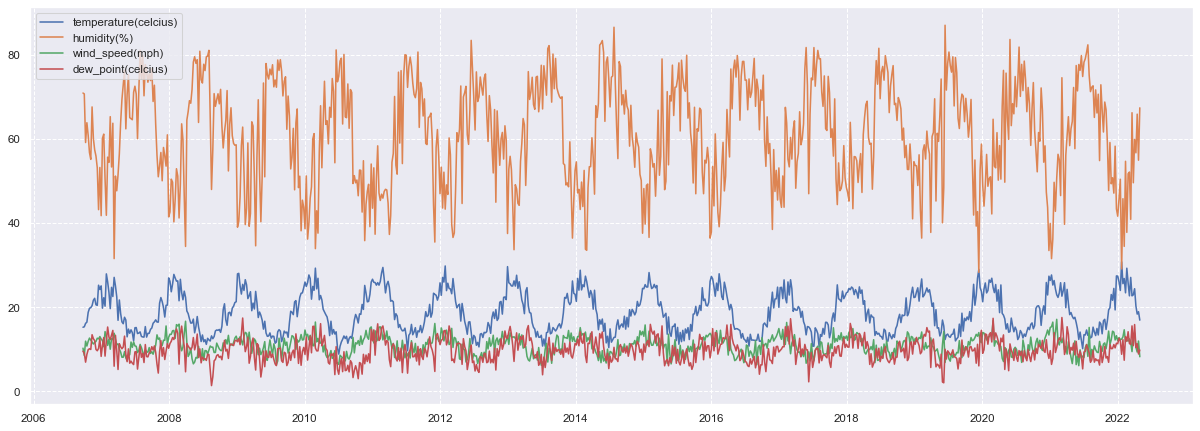

In [32]:
sub_w_df = df.resample('W')['temperature(celcius)','humidity(%)','wind_speed(mph)','dew_point(celcius)'].mean()
plt.figure(figsize = (20,7))
plt.plot(sub_w_df.index,sub_w_df["temperature(celcius)"], label = "temperature(celcius)")
plt.plot(sub_w_df.index,sub_w_df["humidity(%)"], label = "humidity(%)")
plt.plot(sub_w_df.index,sub_w_df["wind_speed(mph)"], label = "wind_speed(mph)")
plt.plot(sub_w_df.index,sub_w_df["dew_point(celcius)"], label = "dew_point(celcius)")
plt.grid(linestyle = "--")
plt.legend()

For weekly, it is similar to the month trend, only it looks a little more tortuous. The trend of three variables,except temperature, are similar to monthly, and for temperature, higher value and total opposite trend with the other three vaiables. 

### Boxplot for wind

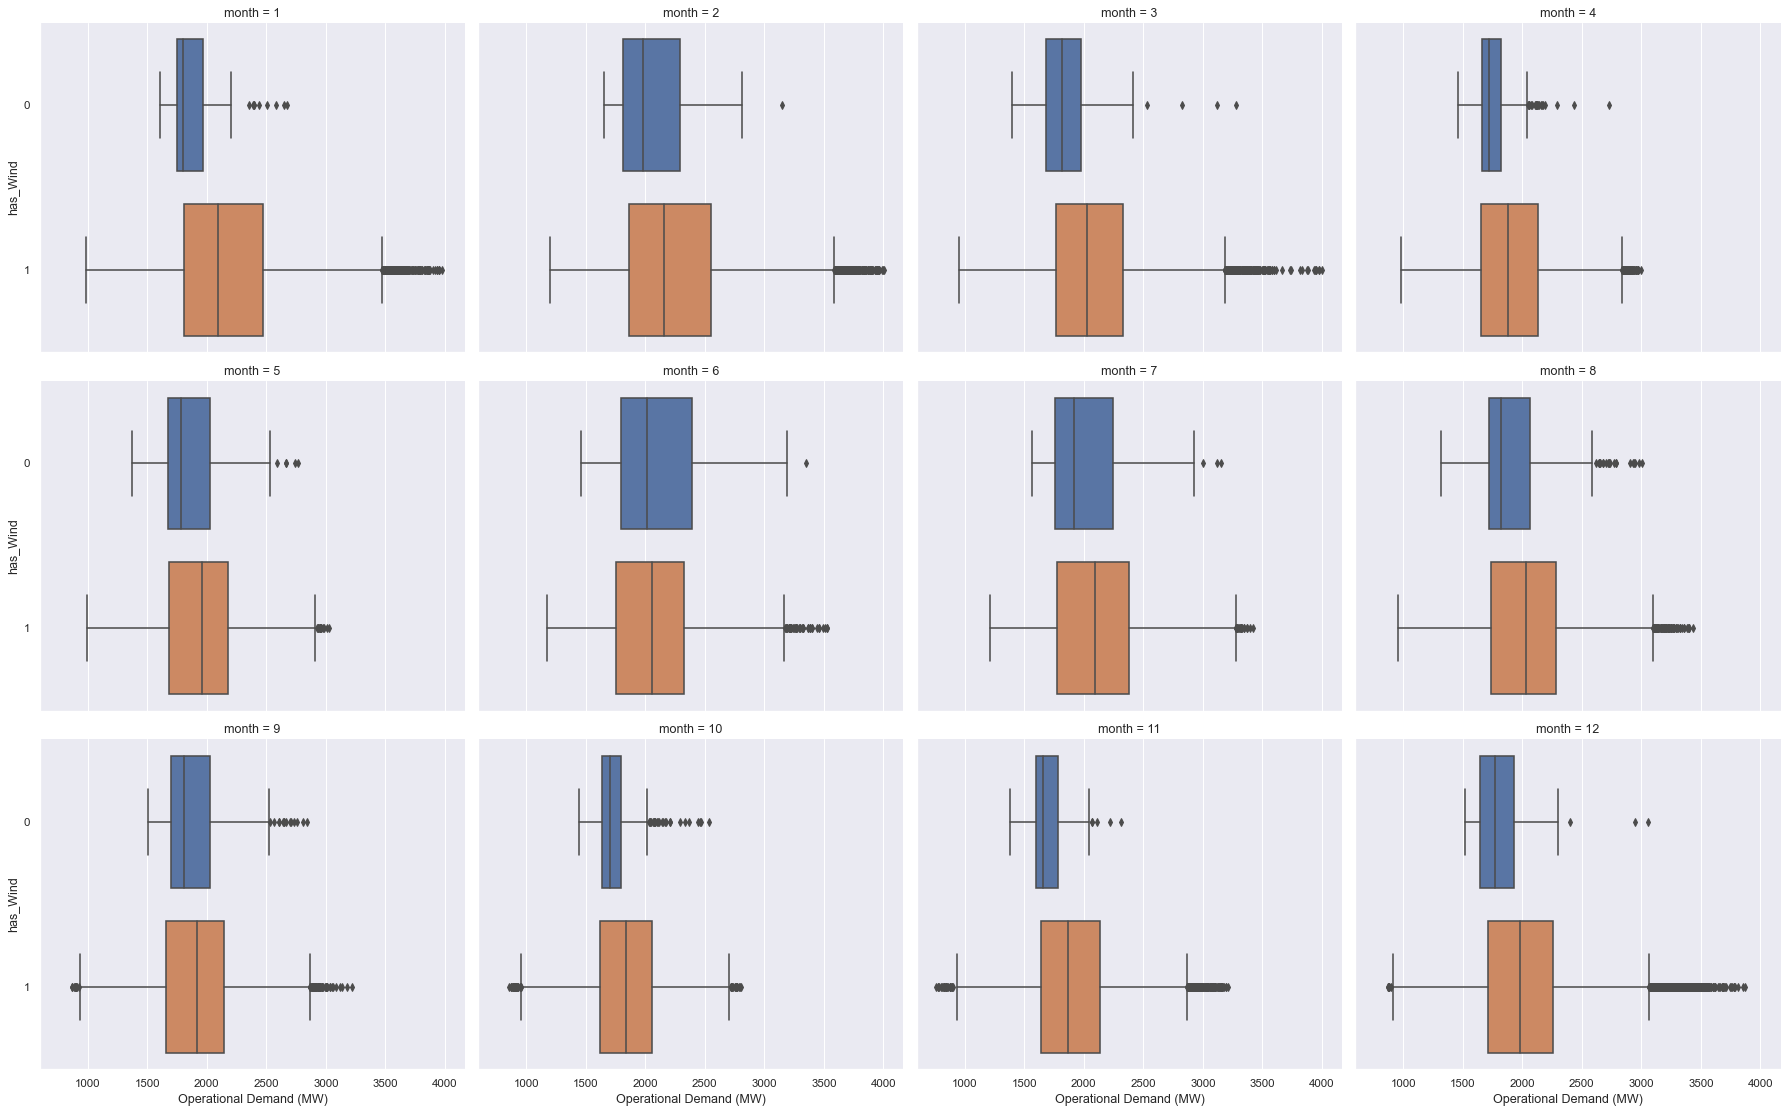

In [33]:
box_p = sns.catplot(kind = 'box', y= 'has_Wind', x = 'Operational Demand (MW)', data = df, col = 'month',
                orient="h", col_wrap= 4, aspect = 1.2)
box_p.set_xlabels("Operational Demand (MW)")